# TD 3 : Le modèle Leaky Integrate-and-Fire
---

In [1]:
# import necessary modules for numerics and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Le modèle Integrate-and-Fire 

La dynamique sous-seuil d'un neurone "Integrate-and-Fire" est décrit par l'équation 
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. Pour faire simple, tous les potentiels sont mésurés rélatif au potentiel de repos $E_L$, qui pour cette raison n'apparaît plus dans l'équation. Chaque fois que le potentiel excède un seuil $V_{\rm seuil}$, on considère que le neurone emet un potentiel d'action, et le potentiel membranaire est remis à une valeur de "reset", $V\to V_{\rm reset}$.

Considérons les paramètres suivants : $\tau=20$ ms et $R=1$ MOhm pour la dynamique sous-seuil, et $V_{\rm seuil}=20$ mV avec $V_{\rm reset}=0$ mV pour le mécanisme de décharge. 

Remarque : Si nous allons spécifier le courant $I$ en nA, nous pouvons calculer le produit $R*I$ sans dévoir transformer des unités, puisque MOhm x nA = mV. 



## E1.1 Solution analytique de la dynamique sous-seuil du modèle Integrate-and-Fire

Quel est le potentiel de la membrane stationnaire - ou le point fixe - pour $t\rightarrow \infty$ si on considère uniquement la dynamique sous-seuil spécifiée ci-dessus, c'est-à-dire en faisant abstraction du mécanisme de décharge ? 

Vérifiez que $$V(t) = RI + (V_0 - RI) \exp(-t/\tau)$$ est une solution de l'équation différentielle avec la condition initiale $V(t=0) = V_0$. 

**Indice**: Rappelez-vous que $\frac{d}{dt} \left( e^{f(t)} \right) = e^{f(t)} \frac{df(t)}{dt}$

In [2]:
# calcul et réponses sur papier

**Solution :** 

A) Pour $t\to\infty$, la fonction exponentielle $\exp(-t/\tau)\to0$, et donc $V\to RI$ si on part de la solution pour $V(t)$ donnée ici. On peut également trouver ce résultat directement à partir de l'équation différentielle plus haut : Pour $t\to\infty$, on peut considérer que le potentiel $V$ aura atteint une valeur stationnaire. Dans l'état stationnaire, $\frac{dV}{dt}=0$, et du coup $V=RI$.

B) Vérifions si $\tau \frac{dV}{dt} = -V + RI$ avec $V=V(t)$ la solution donnée. Le côté gauche est donné par  
$$
\begin{aligned}
\tau \frac{dV}{dt} &= \tau \frac{d}{dt} \left[RI + (V_0 - RI) \exp(-t/\tau)\right] \\
 &= \tau (V_0 - RI) \frac{d}{dt}\exp(-t/\tau) \\
 &= \tau (V_0 - RI) \exp(-t/\tau) \frac{d}{dt} (-\frac{t}{\tau}) \\
 &= - (V_0 - RI) \exp(-t/\tau)
\end{aligned}
$$
Le côté droit est donné par 
$$
\begin{aligned}
- V + RI &= - \left[RI + (V_0 - RI) \exp(-t/\tau)\right] + RI \\
 &= - (V_0 - RI) \exp(-t/\tau)
\end{aligned}
$$
QED.

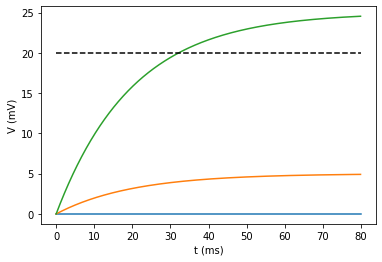

In [3]:
# We can also graphically inspect
# the solution using Python
Vreset = 0.0 # mV
V0 = Vreset
Vseuil = 20. # mV
tau = 20. # ms
R = 5. # MOhm


def v_of_t(t, I):
    return R*I + (V0-R*I)*np.exp(-t/tau)

t = np.arange(0,80,0.1)

fig, ax = plt.subplots()
ax.plot(t, v_of_t(t, 0))
ax.plot(t, v_of_t(t, 1))
ax.plot(t, v_of_t(t, 5))
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
# plot the threshold Vseuil
ax.plot(t, Vseuil*np.ones(len(t)), color='k', linestyle='--')



## E1.2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $V_{\rm seuil}$. Le potentiel est remis à $V \rightarrow V_{\rm reset}$ après le potentiel d'action. 

**Dans quelle condition, c'est-à-dire pour quel courant injecté, le neurone déclenche-t-il des potentiels d'action ?**

Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'input externe $I$. 

**Indice :** Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=V_{\rm reset}$ à $V(T)=V_{\rm seuil}$. Ce temps $T$ entre deux spikes dépend du courant injecté, $T=T(I)$. Le taux de décharge en fonction de l'input est alors donné par $f(I) = 1/T(I)$. Tracez le taux de décharge $f$ en fonction de l'entrée $I$.

In [4]:
# calcul et réponses sur papier

**Réponses :**

A)  Il faut que le courant soit suffissament grand, à savoir $I> V_{\rm seuil}/R$, pour que le potentiel va traverser le seuil à un moment donné. (Quand le neurone n'est pas en train d'émettre un potentiel d'action, le potentiel du neurone est en-dessous du seuil, donc l'approchera par le bas.) 

B) Si $I> V_{\rm seuil}/R$, le neurone va emettre des spikes, et après chaque "reset" le potentiel va remonter en suivant la solution donnée ci-haut, avec $V(t=0)=V_{\rm reset}$ (et $V_{\rm reset}=0$ dans notre cas), jusqu'à ce qu'il atteint le seuil. Le temps $T$ entre un "reset" et un nouveau franchissement du seuil est donc déterminé par l'égalité $V(T)=V_{\rm seuil}$. Avec $V(T) = RI[1-\exp(-T/\tau)]$, on obtient
$$
\begin{aligned}
RI[(1-\exp(-T/\tau)]] &= V_{\rm seuil} \\
\Rightarrow \exp(-T/\tau) &= 1 - \frac{V_{\rm seuil}}{RI} \\
\Rightarrow -T/\tau &= \log(1 - \frac{V_{\rm seuil}}{RI}) \\
\Rightarrow T &= -\tau \log(1 - \frac{V_{\rm seuil}}{RI})
\end{aligned}
$$
Le taux de décharge est donc donné par 
$$f(I) = \frac{1}{ -\tau \log(1 - \frac{V_{\rm seuil}}{RI})}$$

31.066746727980593 Hz


/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0, 0.5, 'f (Hz)')

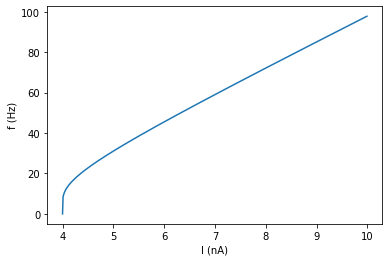

In [5]:
# plot of the firing rate vs. input current
Icrit = Vseuil/R

def f_I_curve(I):
    T_in_ms = -tau*np.log(1-Vseuil/(R*I))
    T_in_s = T_in_ms/1000
    f_in_Hz = 1/T_in_s
    return f_in_Hz

print(f_I_curve(5.), 'Hz')

Iarr = np.arange(Icrit, 10, 0.01)

fig, ax = plt.subplots()
ax.plot(Iarr, f_I_curve(Iarr))
ax.set_xlabel('I (nA)')
ax.set_ylabel('f (Hz)')

## E1.3 Neurone Integrate-and-Fire avec période refractaire

Considérons maintenant un neurone avec une période réfractaire : Dans cette modification du modèle, le neurone n'intégre pas d'inputs pendant une période brève après l'émission d'un spike, similaire aux vrais neurones. Supposons que la période réfractaire dure un temps $D$. Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms ? Quelle est la nouvelle expression pour $f(I)$ ? Tracez $f$ en fonction de $I$. 

**Remarque :** La dynamique sous-seuil, une fois la période refractaire passée, est identique au cas sans période refractaire, c'est-à-dire n'est pas modifiée, et un spike est toujours déclenché quand $V>V_{\rm seuil}$.

**Indice :** Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ affecte $T$. 

In [6]:
# calcul et réponses sur papier

**Réponse :**

La période refractaire correspond simplement à un temps "mort" après le reset, pendant lequel le potentiel ne change pas et reste gélé à la valeur du "reset". Si la durée pour aller du reset au seuil était donnée avant par $T$, il faudra maintenant simplement rajouté la durée de ce "temps mort" avant que la dynamique ne commence : 
$$T_{\rm avec} = T_{\rm sans} + D$$
et du coup
$$f(I) = \frac{1}{ -\tau \log(1 - \frac{\Theta}{RI}) + D}$$

/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


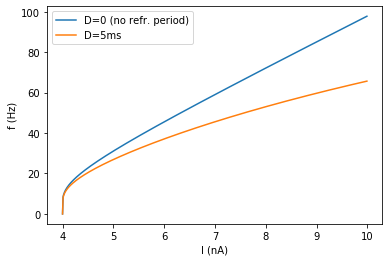

In [7]:
# plotting the f-I-curve with refractory period

def f_I_curve(I,D=0.):
    T_in_ms = -tau*np.log(1-Vseuil/(R*I)) + D
    T_in_s = T_in_ms/1000
    f_in_Hz = 1/T_in_s
    return f_in_Hz

# NOTE: Here, weused the possibility to 
# define a "default" argument value when we 
# create/define a function. When we call 
# the above function with ONLY ONE argument,
# the value of D will be 0.; when we call 
# the function with TWO arguments, the first
# will be used for the current I (as before)
# and the second will be used for the 
# refractory period D

Iarr = np.arange(Icrit, 10, 0.01)

fig, ax = plt.subplots()
ax.plot(Iarr, f_I_curve(Iarr), label='D=0 (no refr. period)')
ax.plot(Iarr, f_I_curve(Iarr, 5.), label='D=5ms')
ax.set_xlabel('I (nA)')
ax.set_ylabel('f (Hz)')
ax.legend()

**Remarque :** Nous observons qu'à faible taux de décharge, c'est-à-dire à des temps interspike longs, la période refractaire ne pèse pas / ne modifie pas de manière importante le taux de décharge ; quand $D$ devient comparable au temps interspike, le taux de décharge est réduit de manière significative.